In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
import txt_mixin

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
import py_block_diagram

In [5]:
import importlib

In [6]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/home/ryanwkrauss/git/py_block_diagram/py_block_diagram/__init__.py'>

In [7]:
import py_block_diagram as pybd

In [8]:
lc = pybd.loop_count_block()

In [9]:
const1 = pybd.int_constant_block(300,'const1')

In [10]:
lc.place_absolute(0,0)

In [11]:
const1.place_relative(lc,"below")

In [12]:
const1.width

1.5

In [13]:
gt1 = pybd.greater_than_block()

In [14]:
gt1.place_relative(lc, "right", yshift=-2)

In [15]:
gt1.set_inputs(lc, const1)

In [16]:
lc.arduino_class

'loop_count_block'

In [17]:
gt1.arduino_class

'greater_than_block'

In [18]:
lc

In [19]:
if1 = pybd.if_block()

In [20]:
const2 = pybd.int_constant_block(-1, "const2")
const3 = pybd.int_constant_block(250, "const3")

In [21]:
const2.place_relative(gt1, "below", xshift=1)

In [22]:
const3.place_relative(const2, "below")

In [23]:
if1.set_inputs(gt1, const2, const3)

In [24]:
if1.place_relative(const2, "right", yshift=-1)

In [25]:
block_list = [lc,const1,gt1,const2,const3, if1]

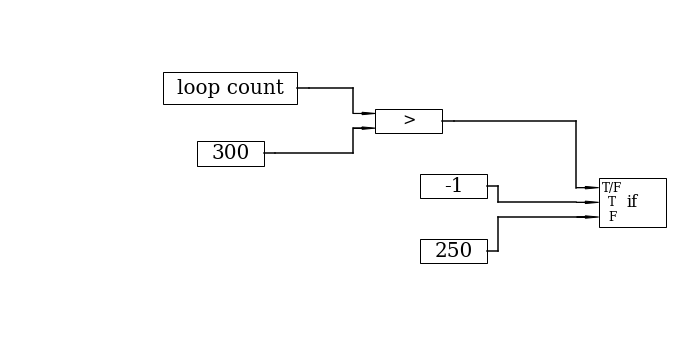

In [26]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
mysys = pybd.block_diagram(block_list,ax)
mysys.draw()
plt.xlim([-5,10])
plt.ylim([-15,5])
mysys.axis_off()

In [27]:
mysys.generate_arduino_code("loop_count_if_test_1","loop_const_if_template.ino")

block: <py_block_diagram.loop_count_block object at 0x7a12e72cb828>
block: <py_block_diagram.int_constant_block object at 0x7a12e72c9a58>
block: <py_block_diagram.greater_than_block object at 0x7a12e72ce668>
block: <py_block_diagram.int_constant_block object at 0x7a12e75464e0>
block: <py_block_diagram.int_constant_block object at 0x7a12e7546438>
block: <py_block_diagram.if_block object at 0x7a12e729c208>


In [28]:
mysys.arduino_file.list

['#include <kraussserial.h>',
 '#include <rtblockdiagram.h>',
 '// both the libraries above need to be installed on student computers',
 '// - what is the most efficient way to accomplish that?',
 '//     - install from zip using the Arduino IDE?',
 '',
 '#define encoderPinA 2',
 '#define squarewave_pin 12',
 'byte inByte;',
 '',
 '// this is the code I am seeking to autogenerate:',
 '/* step_input u = step_input(0.5, 150); */',
 '/* h_bridge_actuator HB = h_bridge_actuator(6, 4, 9);//in1, in2, pwm_pin */',
 '/* encoder enc = encoder(11); */',
 '',
 '/* void enc_isr_wrapper() { */',
 '/*   enc.encoderISR(); */',
 '/* } */',
 '',
 '/* plant G = plant(&HB, &enc); */',
 '/* summing_junction sum1 = summing_junction(&u, &G); */',
 '/* PD_control_block PD = PD_control_block(3, 0.1, &sum1); */',
 '/* saturation_block sat_block = saturation_block(&PD); */',
 '',
 '//bdsysinitcode',
 'loop_count_block lp_cnt_block = loop_count_block();',
 'int_constant_block const1 = int_constant_block(300);',
